<a href="https://colab.research.google.com/github/zenialexandre/Data-Science/blob/main/finalTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** AGE DISTRIBUTION


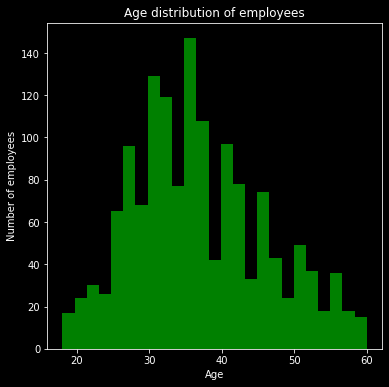


** EXPLORING ATTRITION BY AGE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



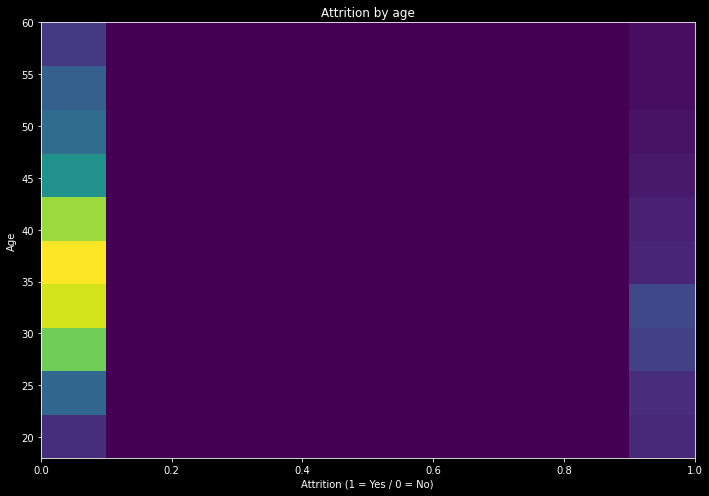


** LEFT EMPLOYEES


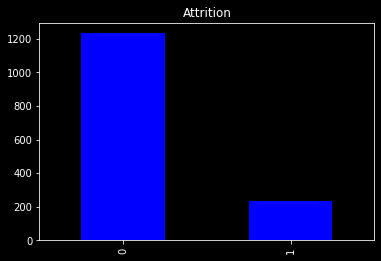


** EDUACATION DISTRIBUTION


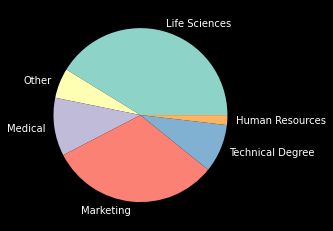


** MARRIED AND UNMARRIED EMPLOYEES


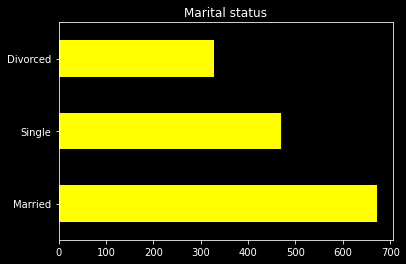


** PREDICTION
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#import plotly.express as px

'''
-> Commands to import the needed file to Colab
from google.colab import files
uploaded = files.upload()
'''

url = 'IBM Attrition Data.csv'

with open(url, encoding='utf8', errors='ignore') as file:
  df_ibm_dataset = pd.read_csv(file)

df_ibm_dataset.head()

#-- Age distribution
print('** AGE DISTRIBUTION')

style.use('dark_background')
plt.figure(figsize=(6, 6))
plt.hist(df_ibm_dataset['Age'], bins=25, color='green')
plt.title('Age distribution of employees')
plt.xlabel('Age')
plt.ylabel('Number of employees')
plt.show()

#-- Exploring attrition by age
print('\n** EXPLORING ATTRITION BY AGE')

def get_parsed_attrition():
  #Yes = 1, #No = 0
  i = 0
  parsed_attrition_values = []
  dataset = df_ibm_dataset['Attrition']

  while i < len(dataset):
    if dataset[i] == 'Yes':
      dataset[i] = 1
    elif dataset[i] == 'No':
      dataset[i] = 0
    i += 1

  for value in dataset:
    parsed_attrition_values.append(value)

  return parsed_attrition_values

fig = plt.subplots(figsize=(10, 7))
#plt.hexbin(get_parsed_attrition(), df_ibm_dataset['Age'], bins=50)
plt.title('Attrition by age')
plt.xlabel('Attrition (1 = Yes / 0 = No)')
plt.ylabel('Age')
plt.tight_layout()
plt.hist2d(get_parsed_attrition(), df_ibm_dataset['Age'])
plt.show()

#-- Exploring Left employees
print('\n** LEFT EMPLOYEES')
attrition_couting = df_ibm_dataset['Attrition'].value_counts()
attrition_couting.plot(kind='bar', color='blue', title='Attrition')
plt.show()

#-- Education distribution
print('\n** EDUACATION DISTRIBUTION')

education_fields = df_ibm_dataset['EducationField']

def get_education_labels():
  pie_chart_labels = []
  for name in education_fields:
    if (name not in pie_chart_labels):
      pie_chart_labels.append(name)
  return pie_chart_labels

def get_education_occurences():
  aux_names = []
  for name in education_fields:
    aux_names.append(name)

  aux_count = [aux_names.count('Life Sciences'), aux_names.count('Other'), aux_names.count('Marketing'), aux_names.count('Medical'), 
  aux_names.count('Technical Degree'), aux_names.count('Human Resources')]

  return aux_count

plt.pie(get_education_occurences(), labels=get_education_labels())
plt.show()

#-- Unmarried and married employees (MaritalStatus)
print('\n** MARRIED AND UNMARRIED EMPLOYEES')
marital_counting = df_ibm_dataset['MaritalStatus'].value_counts()
marital_counting.plot(kind='barh', color='yellow', title='Marital status')
plt.show()

'''
-> Solution with Seaborn
bar_chart = sns.FacetGrid(df_ibm_dataset, hue='MaritalStatus')
bar_chart = bar_chart.map(sns.kdeplot, 'Age', shade=True, alpha=0.5)
bar_chart.add_legend()
'''

'''
-> Using expres
fig = px.bar(df_ibm_dataset, x='MaritalStatus', y='MaritalStatus', color='MaritalStatus', title='Marital Status of employees')
fig.show()
'''

#-- Predict employees that can attrite
print('\n** PREDICTION')
lr = LogisticRegression()
x_data = pd.factorize(df_ibm_dataset['Age'])[0].reshape(-1, 1)
y_target = pd.factorize(df_ibm_dataset['Attrition'])[0].reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.25, random_state=1)

lr.fit(x_train, y_train)
y_prediction = lr.predict(x_test)
print(y_prediction)
